In [ ]:
Q1. What is the relationship between polynomial functions and kernel
functions in machine learning algorithms?
The polynomial kernel is a popular choice of kernel function used in Support Vector
Machines (SVMs) to handle non-linearly separable data. The polynomial kernel maps 
the input data into a higher-dimensional feature space using polynomial functions of the 
original features
The polynomial kernel function is defined as:
 
The degree ( d ) hyperparameter controls the degree of the polynomial used in the kernel 
function. Higher values of degree lead to a more complex decision boundary and may result
in overfitting if not appropriately regularized.The polynomial kernel works by mapping the
input data points from the original feature space to a new high-dimensional feature space 
using a polynomial function. In the new feature space, it is possible to find a hyperplane
that can separate the two classes of data points. The hyperplane in the higher-dimensional
space corresponds to a nonlinear decision boundary in the original input space.One advantage 
of the polynomial kernel is that it can capture complex nonlinear relationships between the input
features without requiring the computational resources needed by other nonlinear kernels like the RBF kernel.


In [ ]:
Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?
1.	Dividing Data into Train/Test Sets.
2.	Training the Model.
3.	Making Predictions.
4.	Evaluating the Model.
5.	Interpreting Results


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples=500, noise=0.13, random_state=42)
df = pd.DataFrame(dict(x1=X[:, 0], x2=X[:, 1], y=y))


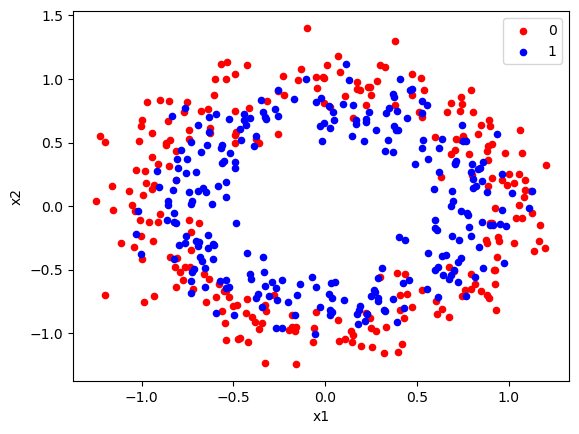

In [5]:
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()


In [ ]:
Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?
The value of ε can affect the number of support vectors used to construct the regression function.
The bigger ε, the fewer support vectors are selected. On the other hand, bigger ε-values results
in more flat estimates. "The value of epsilon determines the level of accuracy of the approximated function


In [ ]:
Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect 
the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and
provide examples of when you might want to increase or decrease its value?

Kernel function: SVM algorithms use a set of mathematical functions that are defined as the kernel.
The function of kernel is to take data as input and transform it into the required form.
Different SVM algorithms use different types of kernel functions. These functions can be different types.
For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.
Introduce Kernel functions for sequence data, graphs, text, images, as well as vectors.
The most used type of kernel function is RBF. Because it has localized and finite response
along the entire x-axis.
The kernel functions return the inner product between two points in a suitable feature space.
Thus by defining a notion of similarity, with little computational cost even in very high-dimensional spaces

Gamma parameter: The gamma parameters can be seen as the inverse of the radius of influence of samples
selected by the model as support vectors.
 
C parameter: The C parameter trades off correct classification of training examples against maximization
of the decision function's margin.
 
Epsilon: Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is
associated in the training loss function with points predicted within a distance epsilon from the actual value.


In [ ]:
Q5. Assignment:
L Import the necessary libraries and load the dataset
L Split the dataset into training and testing sets
L Preprocess the data using any technique of your choice (e.g. scaling, normalization)
L Create an instance of the SVC classifier and train it on the training data
L Use the trained classifier to predict the labels of the testing data
L Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy,
precision, recall, F1-score)
L Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomiMedSearchCV to
improve its performance
L Train the tuned classifier on the entire dataset
L Save the trained classifier to a file for future use.




In [6]:
import numpy as np
import pandas as pd
import pickle


In [7]:
def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df


In [8]:
myData = load_csv('diabetes.csv')
print(myData.head())



  Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0           6     148            72            35       0  33.6   
1           1      85            66            29       0  26.6   
2           8     183            64             0       0  23.3   
3           1      89            66            23      94  28.1   
4           0     137            40            35     168  43.1   

  DiabetesPedigreeFunction Age Outcome  
0                    0.627  50       1  
1                    0.351  31       0  
2                    0.672  32       1  
3                    0.167  21       0  
4                    2.288  33       1  


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


In [10]:
df = pd.read_csv('diabetes.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)



In [11]:
X_train



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
40,3,180,64,25,70,34.0,0.271,26
181,0,119,64,18,92,34.9,0.725,23
354,3,90,78,0,0,42.7,0.559,21
563,6,99,60,19,54,26.9,0.497,32
399,3,193,70,31,0,34.9,0.241,25
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [12]:
y_train

40     0
181    0
354    0
563    0
399    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 729, dtype: int64

In [13]:
mean=np.mean(df['Pregnancies'])
std=np.std(df['Pregnancies'])
print(mean,std)


3.8450520833333335 3.3673836124089886


In [14]:
normalized_data=[]
for i in list(df['Pregnancies']):
    z_score=(i-mean)/std
    normalized_data.append(z_score)


In [15]:
normalized_data

[0.6399472601593618,
 -0.8448850534430246,
 1.233880185600316,
 -0.8448850534430246,
 -1.141851516163502,
 0.3429807974388845,
 -0.25095212800207,
 1.8278131110412708,
 -0.5479185907225473,
 1.233880185600316,
 0.04601433471840724,
 1.8278131110412708,
 1.8278131110412708,
 -0.8448850534430246,
 0.3429807974388845,
 0.9369137228798391,
 -1.141851516163502,
 0.9369137228798391,
 -0.8448850534430246,
 -0.8448850534430246,
 -0.25095212800207,
 1.233880185600316,
 0.9369137228798391,
 1.5308466483207934,
 2.124779573761748,
 1.8278131110412708,
 0.9369137228798391,
 -0.8448850534430246,
 2.7187124992027023,
 0.3429807974388845,
 0.3429807974388845,
 -0.25095212800207,
 -0.25095212800207,
 0.6399472601593618,
 1.8278131110412708,
 0.04601433471840724,
 2.124779573761748,
 1.5308466483207934,
 -0.5479185907225473,
 0.04601433471840724,
 -0.25095212800207,
 0.9369137228798391,
 0.9369137228798391,
 1.5308466483207934,
 0.9369137228798391,
 -1.141851516163502,
 -0.8448850534430246,
 -0.5479185

In [16]:
data = pd.read_csv("diabetes.csv")
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)


In [17]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values


In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)



SVC(random_state=1)

In [ ]:

Y_pred = classifier.predict(X_test)
test_set["Predictions"] = Y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)




In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('Pregnancies', 'Glucose'))(i), label = j)
plt.title('pregnancies Vs Glucose Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

